In [1]:
figure_and_data_name = "fig_00_google_trends"

# Import modules and make plots nice

In [2]:
%matplotlib inline
from pytrends.request import TrendReq
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
sns.set_context("talk")
sns.set_style("darkgrid")
sns.set_palette("hot_r", n_colors=4)

# Functions for time mean and normalization

In [4]:
def get_annual_mean_trend(kw_list, **kwargs):
    trend = TrendReq()
    trend.build_payload(kw_list, timeframe="all")
    trend = trend.interest_over_time()
    trend = trend.resample("1a").mean()
    return trend

# Get Google Trend data

In [5]:
# combine three keywords
rep_trend = get_annual_mean_trend(
    ["reproducibility crisis",
     "replicability crisis", 
     "replication crisis"])
rep_trend_sum = rep_trend.sum(axis=1).rename("Sum: rep... crisis")

# Combine and save data

In [6]:
combined = pd.concat([rep_trend, rep_trend_sum],
                     axis=1)
combined.to_csv("../data/{}.csv".format(figure_and_data_name))

# Plot and save

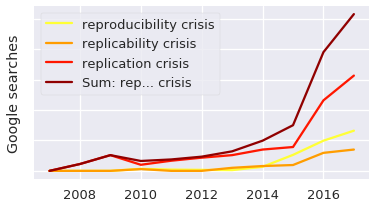

In [7]:
ax = combined[3:].plot()
ax.set(yticklabels=[])
ax.set_aspect(0.1)
ax.set_xlim(2006.5 - 1970, 2017.5 - 1970)
ax.set_xlabel("")
ax.set_ylabel("Google searches")
ax.legend(frameon=True)
plt.savefig("../images/{}.svg".format(figure_and_data_name))